# Aplicação de Python na Agrometeorologia

Este Jupyter Notebook é parte integrande do curso de Python ministrado durante XXII Congresso Brasiliero de Agrometeorologia realizado nos dias 3, 4 e 5 de outubro de 2023 na cidade Natal/RN.

# Importação de bibliotecas

In [10]:
import pandas as pd

# Abertura do arquivo csv

Tratamento da coluna 'Dia' do DataFrame como DateTime e depois converte em index.

In [15]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

df = pd.read_csv(
    '../output/chuva_diaria_cpc_19910901_20221231.csv',
    index_col='Dia', 
    parse_dates=True  
)

In [3]:
#Outra possibilidade de tratar a coluna 'Dia' como DateTime e depois converter em index:
# df['Dia'] = pd.to_datetime(df['Dia'])
# df.set_index('Dia', inplace=True)

Inspeção do DataFrame.

In [4]:
df

,Chuva
Dia,
1991-01-01,1.083005
1991-01-02,1.132334
1991-01-03,1.101605
1991-01-04,1.662441
1991-01-05,1.765939
...,...
2022-12-27,0.583862
2022-12-28,0.579153
2022-12-29,1.396807


Plot básico do DataFrame.

<AxesSubplot:xlabel='Dia'>

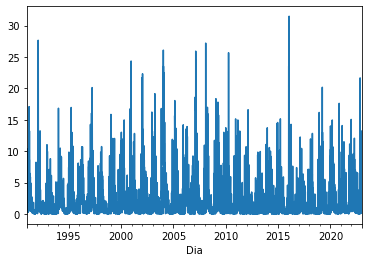

In [5]:
df['Chuva'].plot() # Outra possibilidade: df.Chuva.plot()

# Algumas transformações no DataFrame

## Média móvel

In [11]:
# Documentação:
# https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html

# Explicar a partir do arquivo:
# cbagro2023/output/chuva_diaria_cpc_19910901_20221231_arquivo_auxilio.xlsx

# Média móvel com janela deslizante.
media_movel1 = df.rolling(window=5).mean()

media_movel1.head(10)

,Chuva
Dia,
1991-01-01,NaN
1991-01-02,NaN
1991-01-03,NaN
1991-01-04,NaN
1991-01-05,1.349065
1991-01-06,1.609257
1991-01-07,2.305324
1991-01-08,2.898686
1991-01-09,2.942338


Plot básico da média móvel com janela deslizante.

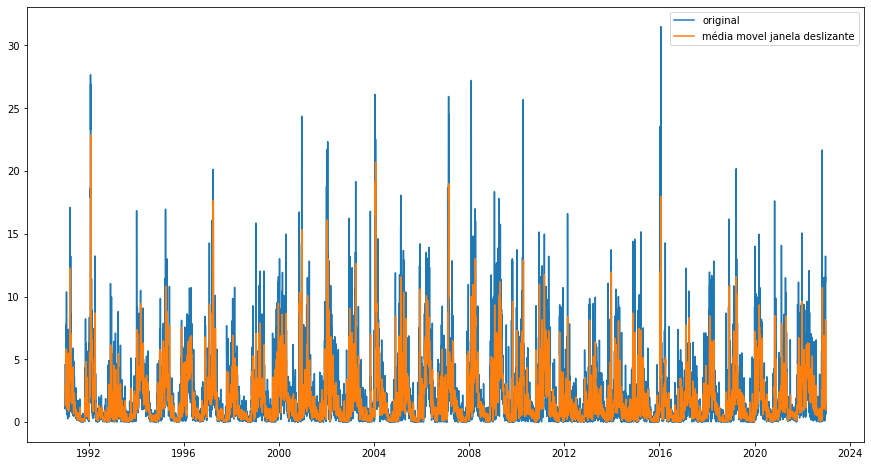

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))

plt.plot(df, label='original')
plt.plot(media_movel1, label='média movel janela deslizante')
plt.legend()

Média móvel com janela fixa.

In [13]:
# Neste caso, calcula a média a cada 5 dias de dados (pêntada).

media_movel2 = df.resample('5D').mean()

media_movel2

,Chuva
Dia,
1991-01-01,1.349065
1991-01-06,2.798643
1991-01-11,4.138704
1991-01-16,4.747704
1991-01-21,5.576074
...,...
2022-12-09,1.191073
2022-12-14,3.208421
2022-12-19,2.969979


Plot básico da média móvel com janela fixa.

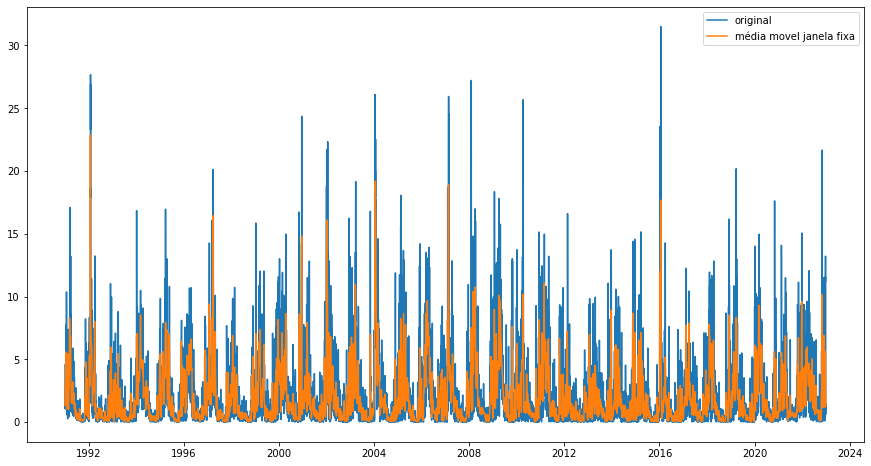

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))

plt.plot(df, label='original')
plt.plot(media_movel2, label='média movel janela fixa')
plt.legend()